# COVID-19 in Nigeria: Exploratory Data Analysis

**BY: JUDITH OKON**

![Picture](covid19-special-notes.png)


## Problem Statement

This Jupyter notebook provides a detailed analysis of the COVID-19 pandemic in Nigeria, focusing on the time period from 2020 to 2022. The analysis is based on a time series dataset of daily confirmed cases, deaths, and recoveries in each state of Nigeria.

In this notebook, I will provide an indepth analysis of the COVID-19 pandemic in Nigeria while answering the following questions;


1.  What was the total confirmed cases in Nigeria for the time period of this analysis?

2.  What was the total deaths cases in Nigeria for the time period of this analysis?

3. What was the total recovered cases in Nigeria for the time period of this analysis?

4. What was the mortality rate in Nigeria from covid-19?

5. What was the recovery rate in Nigeria from covid-19?

6. What was the daily average of confirmed, death, and recovered cases in Nigeria for the time period of the analysis?

7. What was the monthly average of confirmed, death, and recovered cases in Nigeria for the time period of the analysis?

8. What state was most affected by the pandemic?

9. Was there any correlation between the number of confirmed, death and recovery cases?

Through this analysis, I aim to provide valuable insights into the dynamics of the COVID-19 pandemic in Nigeria, and to inform policy makers, public health officials, and the general public about the state of the pandemic during the time period of this dataset.


________

# DATA LOADING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('covid19 nigeria dataset.csv')

In [3]:
df.head()

,ID,DATE,ISO_3,PAYS,ID_PAYS,REGION,ID_REGION,CONTAMINES,DECES,GUERIS,CONTAMINES_FEMME,CONTAMINES_HOMME,CONTAMINES_GENRE_NON_SPECIFIE,SOURCE
0,1,2/27/20,NGA,Nigéria,15,Abia,170,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
1,2,2/27/20,NGA,Nigéria,15,Adamawa,171,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
2,3,2/27/20,NGA,Nigéria,15,Akwa Ibom,172,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
3,4,2/27/20,NGA,Nigéria,15,Anambra,173,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
4,5,2/27/20,NGA,Nigéria,15,Bauchi,174,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26866 entries, 0 to 26865
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             26866 non-null  int64  
 1   DATE                           26866 non-null  object 
 2   ISO_3                          26866 non-null  object 
 3   PAYS                           26866 non-null  object 
 4   ID_PAYS                        26866 non-null  int64  
 5   REGION                         26866 non-null  object 
 6   ID_REGION                      26866 non-null  int64  
 7   CONTAMINES                     26802 non-null  float64
 8   DECES                          26463 non-null  float64
 9   GUERIS                         26280 non-null  float64
 10  CONTAMINES_FEMME               17734 non-null  float64
 11  CONTAMINES_HOMME               17734 non-null  float64
 12  CONTAMINES_GENRE_NON_SPECIFIE  23663 non-null 

In [5]:
print(('There are {} rows and {} columns').format(df.shape[0], df.shape[1]))

There are 26866 rows and 14 columns


In [6]:
rd = df.sample(10)
rd.T

,8784,11073,17273,13879,20166,25750,4542,15945,16819,8047
ID,8785,11074,17274,13880,20167,25751,4543,15946,16820,8048
DATE,10/15/20,12/14/20,5/26/21,2/26/21,8/10/21,1/4/22,6/25/20,4/21/21,5/14/21,9/25/20
ISO_3,NGA,NGA,NGA,NGA,NGA,NGA,NGA,NGA,NGA,NGA
PAYS,Nigéria,Nigéria,Nigéria,Nigéria,Nigéria,Nigéria,Nigéria,Nigéria,Nigéria,Nigéria
ID_PAYS,15,15,15,15,15,15,15,15,15,15
REGION,Benue,Gombe,Kebbi,Delta,Niger,Lagos,Katsina,Kwara,Kwara,Ondo
ID_REGION,176,185,191,179,196,194,190,193,193,199
CONTAMINES,0.0,0.0,0.0,6.0,0.0,337.0,25.0,0.0,0.0,12.0
DECES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GUERIS,0.0,0.0,0.0,0.0,0.0,3.0,28.0,0.0,0.0,0.0


Our dataset needs some cleaning, this will be done in the next section

In [7]:
data1 = df.copy() # Create a backup copy

___

# DATA CLEANING

I observed some issues with the dataset that required cleaning, they include;

1. Dropping some unnecessary columns
2. Correcting the names under PAYS column
3. Handling missing values
4. Changing datatype of float to int and date to datetime
5. Changing the column name to English
6. Checking for irregularities in the dataset
7. Dropping non-specifie rows from original dataframe

***Let's begin data cleaning***

## 1. Dropping some unnecessary columns 

- The ID column will be dropped because the index column will be used
- The ISO_3 column will be dropped because PAYS column shows the full name
- The ID_PAYS column wil be dropped because it doesnt add any relevance to our analysis
- The ID_REGION will be dropped because the REGION column is sufficient
- The SOURCE column wil be dropped because it doesnt add any relevance to our analysis
- The CONTAMINES_FEMME, CONTAMINES_HOMME and CONTAMINES_GENRE_NON_SPECIFIE columns were not accuratley curated and gave a lot of problems when I tried analysing it, so they will be dropped.

In [8]:
df.drop(['ID','ISO_3','ID_PAYS', 'ID_REGION', 'SOURCE', 'CONTAMINES_FEMME', 
         'CONTAMINES_HOMME', 'CONTAMINES_GENRE_NON_SPECIFIE'], axis =1, inplace = True)

In [9]:
df.head(5)

,DATE,PAYS,REGION,CONTAMINES,DECES,GUERIS
0,2/27/20,Nigéria,Abia,0.0,0.0,0.0
1,2/27/20,Nigéria,Adamawa,0.0,0.0,0.0
2,2/27/20,Nigéria,Akwa Ibom,0.0,0.0,0.0
3,2/27/20,Nigéria,Anambra,0.0,0.0,0.0
4,2/27/20,Nigéria,Bauchi,0.0,0.0,0.0


## 2. Correcting the names under PAYS column

The name Nigéria will be changed to Nigeria

In [10]:
df['PAYS']= df['PAYS'].replace('Nigéria', 'Nigeria')

In [11]:
df[['PAYS']].sample(5)

,PAYS
24023,Nigeria
9849,Nigeria
20480,Nigeria
15927,Nigeria
11870,Nigeria


## 3. Handling missing values

In [12]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(ascending = False)

GUERIS        586
DECES         403
CONTAMINES     64
dtype: int64

The missing values will be replaced with 0. I believe if a value was not recorded for contaminated, deaths and recovered columns etc, that means there were no values to record.

In [13]:
df = df.fillna(0)

In [14]:
df.isnull().sum().sum()

0

All the missing vales have been handled

## 4. Changing datatype of float to int and date to datetime

The number of a people in a place can be discribed as a dicrete variables, we cannot have 2.2 people in a room, so I will change the datatype of each 'non object' value here to an int datatype.

The date column should be in a datetime datatype

**Changing the datatype of numerical variables to int**

In [15]:
numerical = [feature for feature in df.columns if df[feature].dtypes != 'O']
print(numerical)

['CONTAMINES', 'DECES', 'GUERIS']


In [16]:
df[numerical] = df[numerical].astype(int)

df['CONTAMINES'].dtype

dtype('int64')

**Changing the datatype of date column to datetime**

In [17]:
df['DATE'] = pd.to_datetime(df['DATE'], format = '%m/%d/%y')

df[['DATE']].sample(5)

,DATE
17244,2021-05-25
5105,2020-07-10
17349,2021-05-28
24897,2021-12-13
23065,2021-10-25


## 5. Changing the column names to English

These column names are in french, so I will be changing it to english because I am working with the english language. Also, they will be changed to lower case letters for ease of use.  

In [18]:
df = df.rename(columns = {'PAYS': 'country', 'REGION': 'state', 'CONTAMINES': 'confirmed', 'DECES':'deaths', 
           'GUERIS': 'recovered'})

df.columns = df.columns.str.lower()

In [19]:
df.head()

,date,country,state,confirmed,deaths,recovered
0,2020-02-27,Nigeria,Abia,0,0,0
1,2020-02-27,Nigeria,Adamawa,0,0,0
2,2020-02-27,Nigeria,Akwa Ibom,0,0,0
3,2020-02-27,Nigeria,Anambra,0,0,0
4,2020-02-27,Nigeria,Bauchi,0,0,0


## 6. Checking for irregularities in the dataset

In [20]:
df.describe()

,confirmed,deaths,recovered
count,26866.000000,26866.000000,26866.000000
mean,9.417963,0.116690,8.524492
std,45.695065,0.935739,106.549817
min,-1.000000,0.000000,-46.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000
max,3393.000000,79.000000,10946.000000


There are some irregularities in the minimun values of confirmed, recovered, confirmed_males and confirmed_gender_unspecified. Humans cannot be quantified with a negative value, so I will investigate further and fix.

**First Fix**

In [21]:
df.loc[df['confirmed'] == -1]

,date,country,state,confirmed,deaths,recovered
24323,2021-11-28,Nigeria,Anambra,-1,0,0


In [22]:
# Change value to 0, because that the most common value. I could have dropped it, if it was not a time series data.

df.loc[24323, 'confirmed'] = 0

**Second Fix**

In [23]:
df.loc[df['recovered'] == -46]

,date,country,state,confirmed,deaths,recovered
23799,2021-11-14,Nigeria,Edo,0,8,-46


In [24]:
# Also change value to 0

df.loc[23799, 'recovered'] = 0

I am done fixing all negative value issues, let us recheck.

In [25]:
df.describe()

,confirmed,deaths,recovered
count,26866.000000,26866.000000,26866.000000
mean,9.418000,0.116690,8.526204
std,45.695056,0.935739,106.549310
min,0.000000,0.000000,-11.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000
max,3393.000000,79.000000,10946.000000


Wow, after handling the one negative number in recovered column, another one has popped up.

**Third Fix**

In [26]:
df.loc[df['recovered'] == -11]

,date,country,state,confirmed,deaths,recovered
25923,2022-01-09,Nigeria,Borno,0,0,-11


In [27]:
# change value to 0

df.loc[25923, 'recovered'] = 0

I am done handling again, however let us recheck again

In [28]:
df.describe()

,confirmed,deaths,recovered
count,26866.000000,26866.000000,26866.000000
mean,9.418000,0.116690,8.526614
std,45.695056,0.935739,106.549257
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000
max,3393.000000,79.000000,10946.000000


Finally, no negative values in sight.

## 7. Dropping non-specifie rows from the dataframe

In a further analysis, I noticed that the state column had values called Non spécifié. Non spécifié is not a state in Nigeria and all its values are 0, so these rows will be dropped from the dataset. 


In [29]:
# Dropping the rows
df = df.drop(df.loc[df['state'] == 'Non spécifié'].index)
df = df.reset_index(drop = True) #to reset the index of the original dataframe

In [30]:
df['state'].unique()

array(['Abia', 'Adamawa', 'Akwa Ibom', 'Anambra', 'Bauchi', 'Bayelsa',
       'Benue', 'Borno', 'Cross River', 'Delta', 'Ebonyi', 'Edo', 'Ekiti',
       'Enugu', 'Federal Capital Territory', 'Gombe', 'Imo', 'Jigawa',
       'Kaduna', 'Kano', 'Katsina', 'Kebbi', 'Kogi', 'Kwara', 'Lagos',
       'Nasarawa', 'Niger', 'Ogun', 'Osun', 'Ondo', 'Oyo', 'Plateau',
       'Rivers', 'Sokoto', 'Taraba', 'Yobe', 'Zamfara'], dtype=object)

In [31]:
df.head()

,date,country,state,confirmed,deaths,recovered
0,2020-02-27,Nigeria,Abia,0,0,0
1,2020-02-27,Nigeria,Adamawa,0,0,0
2,2020-02-27,Nigeria,Akwa Ibom,0,0,0
3,2020-02-27,Nigeria,Anambra,0,0,0
4,2020-02-27,Nigeria,Bauchi,0,0,0


In [32]:
print('There are {} rows and {} columns in the dataframe'.format(df.shape[0],df.shape[1]))

There are 26159 rows and 6 columns in the dataframe


___

# DATA EXPLORATION & VISUALIZATION

>**Now to the main event.**

The questions asked in the <a href="#Problem-Statement">Problem Statement Section</a> will be explored, visualized and answered in this section. Visualization of the data will be achieved using barcharts, line plots,pie chart, heatmaps and scatter plots.

## 1. What was the total confirmed cases in Nigeria for the time period of this analysis?

In order to answer this question, all values with the same date will grouped and summed together and a line plot will be created to visualize the daily trend of confirmed cases  in Nigeria from 2020 to 2022 

In [33]:
# Find the daily total by grouping all values with same date together and summing it 
daily_confirmed = df.groupby('date')['confirmed'].sum()

daily_confirmed.sample(5)

date
2021-09-13    387
2020-08-07    443
2021-04-02     66
2021-11-04     87
2021-10-19    131
Name: confirmed, dtype: int64

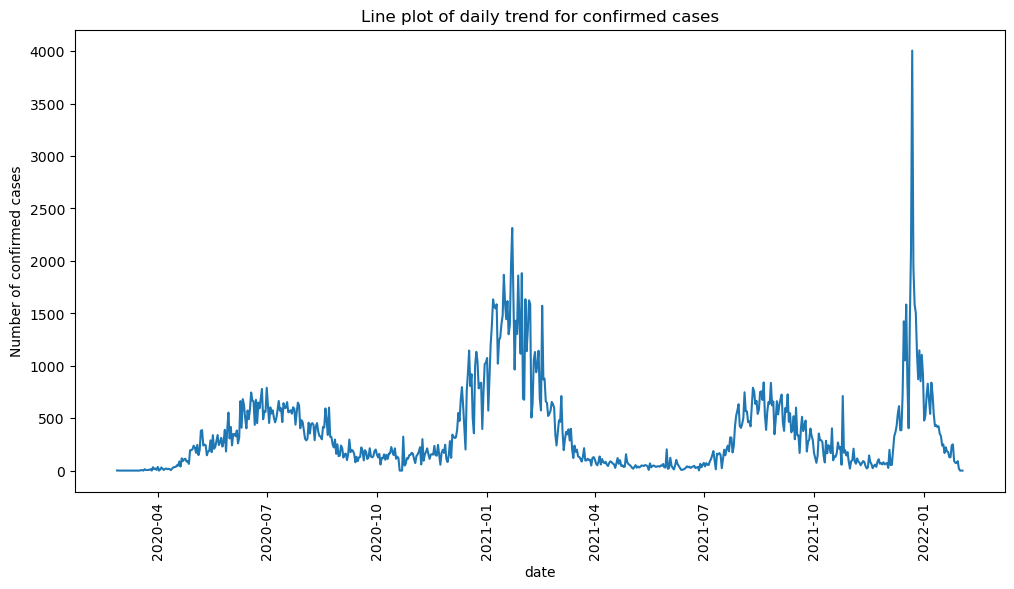

In [34]:
# Create a figure and axis object
fig,ax = plt.subplots(figsize = (12,6))

# Create a line plot for the data
plt.plot(daily_confirmed.index, daily_confirmed.values)

# set the parameters
plt.title('Line plot of daily trend for confirmed cases')
plt.xlabel('date')
plt.xticks(rotation = 90)
plt.ylabel('Number of confirmed cases');

Based on this line plot for confirmed cases in Nigeria, it can be observed that the first wave of the pandemic in Nigeria began in April 2020. Before that month, we noticed a straight line in the plot marking around 0 meaning there were no confirmed cases before April 2020. 

These confirmed cases continued to rise and fall gradually. However, towards the end of 2021 and the beginning of 2022, there was a very high number of daily confirmed case as seen in the plot.

In [35]:
ans1 = daily_confirmed.values.sum()
print('The total Confirmed Cases in Nigeria for the time period of the analysis was {}'.format(ans1))

The total Confirmed Cases in Nigeria for the time period of the analysis was 253024


## 2. What was the total death cases in Nigeria for the time period of this analysis?

In order to answer this question, all values with the same date will grouped and summed together and a line plot will be created to visualize the daily trend of death cases in Nigeria from 2020 to 2022

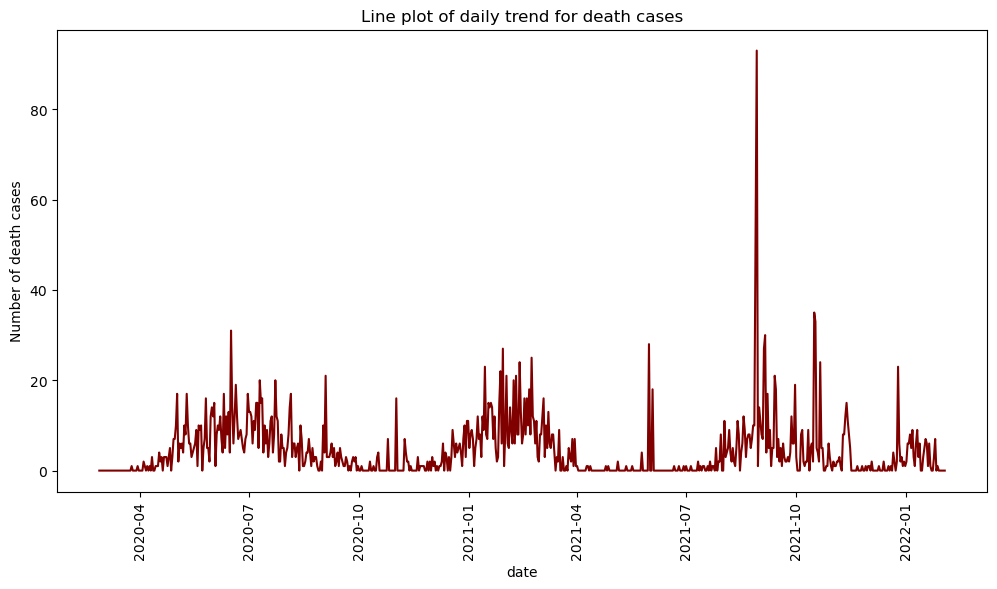

In [36]:
# Find the daily total by grouping all values with same date together and summing it 
daily_death = df.groupby('date')['deaths'].sum()

# Create a figure and axis object
fig,ax = plt.subplots(figsize = (12,6))

# Create a line plot for the data
plt.plot(daily_death.index, daily_death.values, color = 'maroon')

# set the parameters
plt.title('Line plot of daily trend for death cases')
plt.xlabel('date')
plt.xticks(rotation = 90)
plt.ylabel('Number of death cases');

Based on this line plot for death cases in Nigeria, the cases were quite controlled and didnt go pass a particular point. However there were records of high death cases once in a while. The highest was seen around August to september 2021 from the plot.

In [37]:
ans2 = daily_death.values.sum()
print('The total death Cases in Nigeria for the time period of the analysis was {}'.format(ans2))

The total death Cases in Nigeria for the time period of the analysis was 3135


## 3. What was the total recovered cases in Nigeria for the time period of this analysis?

In order to answer this question, all values with the same date will grouped and summed together and a line plot will be created to visualize the daily trend of recovered cases in Nigeria from 2020 to 2022

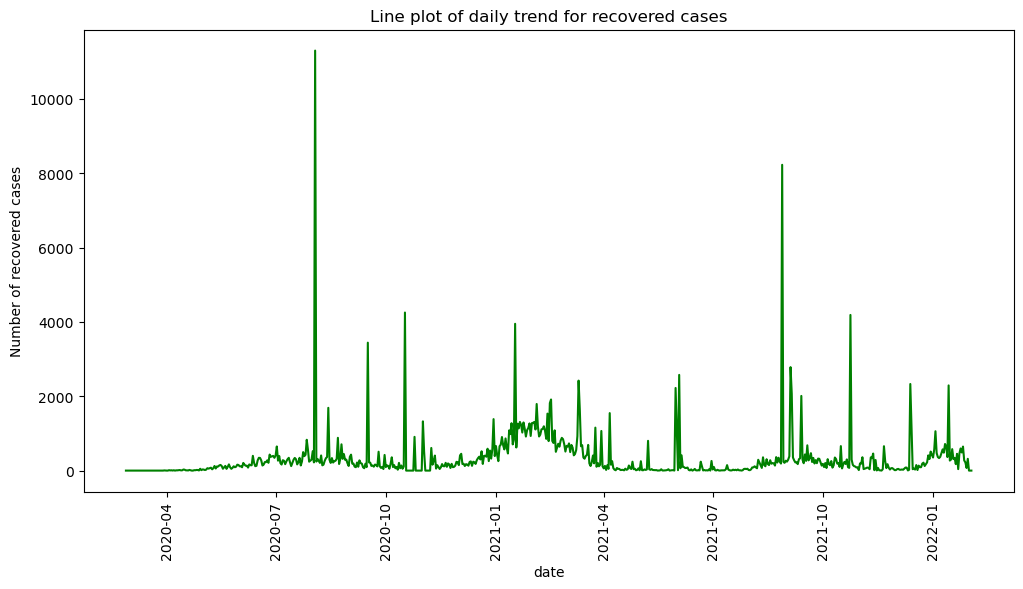

In [38]:
# Find the daily total by grouping all values with same date together and summing it 
daily_recovered = df.groupby('date')['recovered'].sum()

# Create a figure and axis object
fig,ax = plt.subplots(figsize = (12,6))

# Create a line plot for the data
plt.plot(daily_recovered.index, daily_recovered.values, color = 'green')

# set the parameters
plt.title('Line plot of daily trend for recovered cases')
plt.xlabel('date')
plt.xticks(rotation = 90)
plt.ylabel('Number of recovered cases');

Based on this line plot for recovered cases in Nigeria, the cases were also quite controlled and didnt go pass a certain point sometimes. However, there were many random points with high recovered case once in a while. The highest number of recovered case was spotted around August 2020 from the plot.

In [39]:
ans3 = daily_recovered.values.sum()
print('The total recovered Cases in Nigeria for the time period of the analysis was {}'.format(ans3))

The total recovered Cases in Nigeria for the time period of the analysis was 229076


## 4. What was the mortality rate in Nigeria from covid-19?

Mortality rate can be defined as the number of death cases divided by the number of confirmed cases in Nigeria. A new column called mortality_rate will be created and grouped by date, so we can visualize the daily mortality rate from 2020 to 2022 in Nigeria

In [40]:
# Find the total daily confirmed and death cases, and put result in a new dataframe
mortality = df.groupby('date')[['confirmed', 'deaths']].sum()
mortality = pd.DataFrame(mortality)

# Create a new column for mortality rate
mortality['mortality_rate%'] = round(mortality['deaths']/mortality['confirmed']*100,2)

# For columns where both values are 0, the result will be a NaN value, so I will replace NaN with 0
mortality['mortality_rate%'] = mortality['mortality_rate%'].fillna(0)

# 0 divided by a whole number eg (0/1) will result in inf. So we I replace inf value with 0
mortality['mortality_rate%'] = mortality['mortality_rate%'].replace(np.inf, 0)

# Show the result
mortality.sample(5)

,confirmed,deaths,mortality_rate%
date,,,
2020-11-19,146,3,2.05
2022-01-17,251,7,2.79
2021-07-28,524,2,0.38
2020-12-09,474,2,0.42
2021-03-22,131,0,0.00


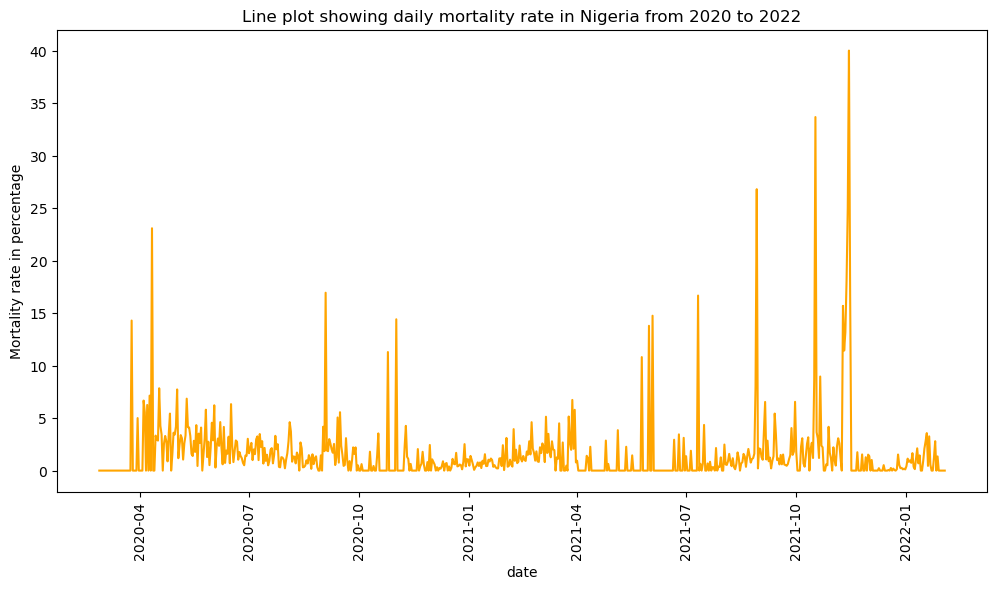

In [41]:
# Create a figure and axis object
fig,ax = plt.subplots(figsize = (12,6))
    
# Create a time series for all cases
plt.plot(mortality.index, mortality['mortality_rate%'], color = 'orange')
    
# Set the other parameters
plt.title('Line plot showing daily mortality rate in Nigeria from 2020 to 2022')
plt.xlabel('date')
plt.xticks(rotation = 90)
plt.ylabel('Mortality rate in percentage')

plt.show()

From this Line plot, the mortality rate continued to fluctuate throughout both years, however the highest mortality rate was seen around the end of the year 2021 from the plot. 

In total, the mortality rate all through 2020 to 2022 in Nigeria was 1.24%, meaning only a small population died from the virus. 

In [42]:
ans4 = round((ans2/ans1)*100,2)
print('The total mortality rate in Nigeria was {}%'.format(ans4))

The total mortality rate in Nigeria was 1.24%


## 5. What was the recovery rate in Nigeria from covid-19?

Recovery rate can be defined as the number of recovery cases divided by the number of confirmed cases in Nigeria. A new column called recovery_rate will be created and grouped by date, so we can visualize the daily recovery rate from 2020 to 2022 in Nigeria

In [43]:
# Find the total daily confirmed and recovered cases, and put result in a new dataframe
recovery = df.groupby('date')[['confirmed', 'recovered']].sum()
recovery = pd.DataFrame(recovery)

# Create a new column for mortality rate
recovery['recovery_rate%'] = round(recovery['recovered']/recovery['confirmed']*100,2)

# For columns where both values are 0, the result will be a NaN value, so I will replace NaN with 0
recovery['recovery_rate%'] = recovery['recovery_rate%'].fillna(0)

# 0 divided by a whole number eg (0/1) will result in inf. So we I replace inf value with 0
recovery['recovery_rate%'] = recovery['recovery_rate%'].replace(np.inf, 0)

# Show the result
recovery.sample(5)

,confirmed,recovered,recovery_rate%
date,,,
2021-02-22,542,723,133.39
2021-11-14,20,285,1425.00
2021-05-28,63,11,17.46
2021-10-09,142,80,56.34
2021-05-15,41,13,31.71


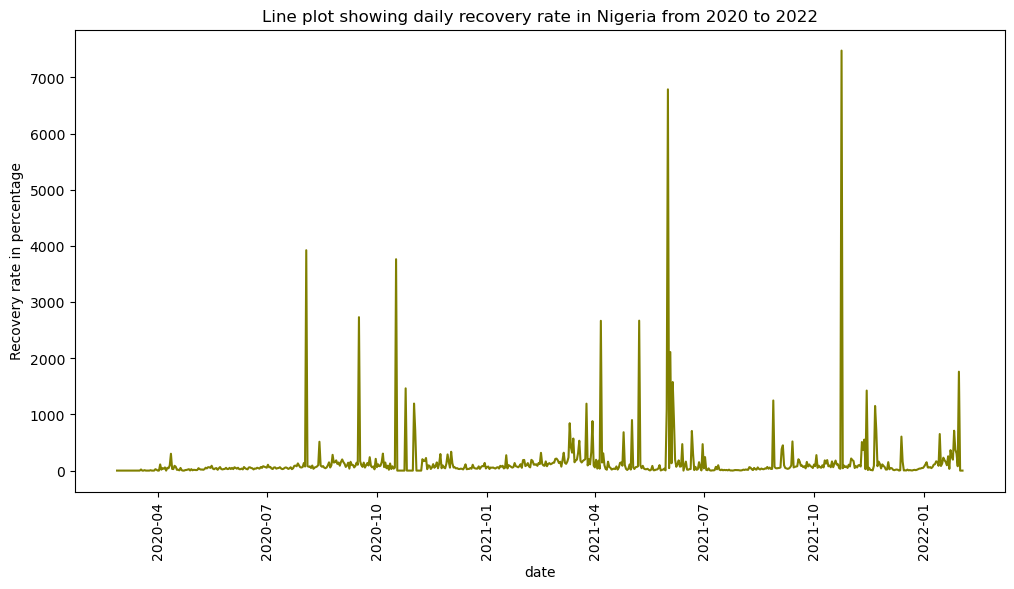

In [44]:
# Create a figure and axis object
fig,ax = plt.subplots(figsize = (12,6))
    
# Create a time series for all cases
plt.plot(recovery.index, recovery['recovery_rate%'], color = 'olive')
    
# Set the other parameters
plt.title('Line plot showing daily recovery rate in Nigeria from 2020 to 2022')
plt.xlabel('date')
plt.xticks(rotation = 90)
plt.ylabel('Recovery rate in percentage')

plt.show()

From this Line plot, the recovery rate was almost constant all through both years, however there were the occasional high spikes in recovery rate. Some of the highest spikes were seen around June 2021 and another around November 2021 from the plot.

In total, the recovery rate all through 2020 to 2022 in Nigeria was 90.54%, meaning a high percentage of Nigerians that contacted the virus during this period made a full recovery. 

In [45]:
ans5 = round((ans3/ans1)*100,2)
print('The total recovery rate in Nigeria was {}%'.format(ans5))

The total recovery rate in Nigeria was 90.54%


## 6. What was the daily average number of confirmed, death and recovered cases in Nigeria?

I will group all three cases by same date, and visualize these cases from February 2020 to February 2022 with a line plot

In [46]:
# Find the daily average of confirmed,death and recovered cases in Nigeria from 2020 to 2022
average_cases = df.groupby('date')[['confirmed','deaths','recovered']].mean()
average_cases = round(average_cases)

# convert result to a dataframe. The date becomes the index while confirmed, death and recovered will
# have their own columns
average_cases = pd.DataFrame(average_cases)
average_cases.sample(5)

,confirmed,deaths,recovered
date,,,
2020-06-09,18.0,0.0,4.0
2020-11-28,3.0,0.0,4.0
2020-12-03,9.0,0.0,12.0
2021-03-12,11.0,0.0,45.0
2020-09-05,4.0,0.0,3.0


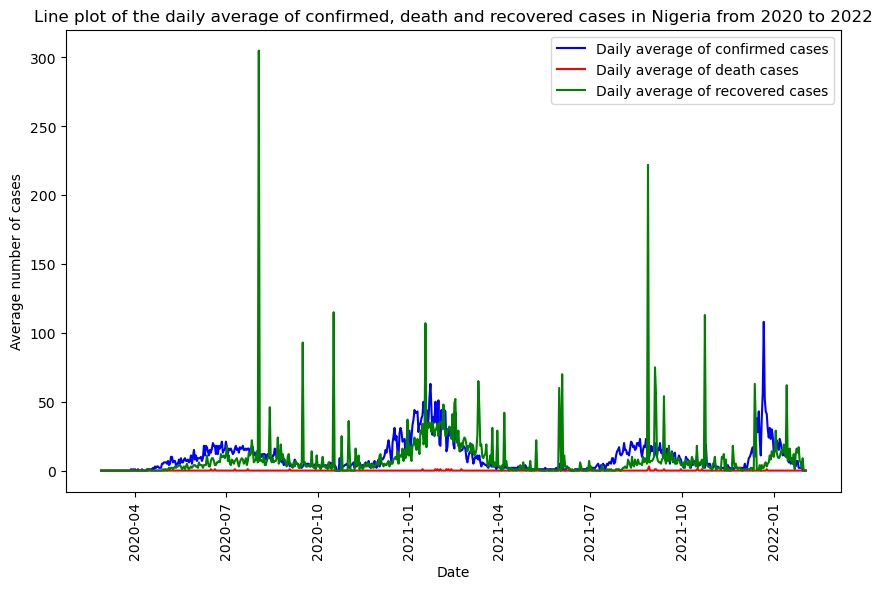

In [47]:
fig,ax = plt.subplots(figsize = (10,6))

plt.plot(average_cases.index, average_cases['confirmed'], color = 'blue', label = 'Daily average of confirmed cases')
plt.plot(average_cases.index, average_cases['deaths'], color = 'red', label = 'Daily average of death cases')
plt.plot(average_cases.index, average_cases['recovered'], color = 'green', label = 'Daily average of recovered cases')


plt.legend()
plt.xlabel('Date')
plt.ylabel('Average number of cases')
plt.xticks(rotation = 90)
plt.title('Line plot of the daily average of confirmed, death and recovered cases in Nigeria from 2020 to 2022')

plt.show()

From the Line plot showing the daily average confirmed, deaths and recovered cases overtime, the daily average number of death cases was seen to be constantly low over the time period, the daily average number of confirmed cases gradually rose and fell overtime and the daily average number of recovered cases showed sharp increase at random points during the 2020 to 2022 period. 

In [48]:
ans6 =  round(average_cases['confirmed'].mean())
ans7 =  round(average_cases['deaths'].mean(),2)
ans8 =  round(average_cases['recovered'].mean())

print('The daily average number of confirmed cases in Nigeria was {}'.format(ans6))
print('The daily average number of death cases in Nigeria was {}'.format(ans7))
print('The daily average number of recovered cases in Nigeria was {}'.format(ans8))

The daily average number of confirmed cases in Nigeria was 10
The daily average number of death cases in Nigeria was 0.04
The daily average number of recovered cases in Nigeria was 9


## 7. What was the monthly average number of confirmed, death and recovered cases in Nigeria?

I will group all three cases by same month&year, and visualize these cases from February 2020 to February 2022 using a bar plot

**Firstly, I will create a new column that consists of only month and year**

In [49]:
# Create a new column that has only month and year values
df['month_year'] = df['date'].dt.strftime('%m-%Y')

# The result of the datatype is object, but we have to convert the datatype to 'datetype' for it to be ordered 
# in calendar style
df['month_year'] = pd.to_datetime(df['date']).dt.to_period('M') 

df['month_year'].dtype

period[M]

**Secondly, I will create a new dataframe where each month-year eg 02-2020 shows the monthly average number of confirmed, death and recovered cases in Nigeria**

In [50]:
# Find the total number of confirmed,death and recovered cases in Nigeria for each month from 2020 to 2022
month_yr_cases = df.groupby('month_year')[['confirmed','deaths','recovered']].mean()

# convert result to a dataframe. The month_year date becomes the index while confirmed, death and recovered will
# have their own columns
month_yr_cases =  pd.DataFrame(month_yr_cases)

#round up the values for confirmed and recovered but leave death cases because rounding it will give 0 for all values
month_yr_cases[['confirmed','recovered']] = round(month_yr_cases[['confirmed','recovered']])

month_yr_cases

,confirmed,deaths,recovered
month_year,,,
2020-02,0.0,0.000000,0.0
2020-03,0.0,0.001744,0.0
2020-04,2.0,0.049550,0.0
2020-05,7.0,0.200523,2.0
2020-06,14.0,0.272973,6.0
2020-07,15.0,0.251962,9.0
2020-08,9.0,0.116827,19.0
2020-09,4.0,0.089189,8.0
2020-10,3.0,0.015693,6.0


**Thirdly, I will draw a bar plot to visualize the above table**

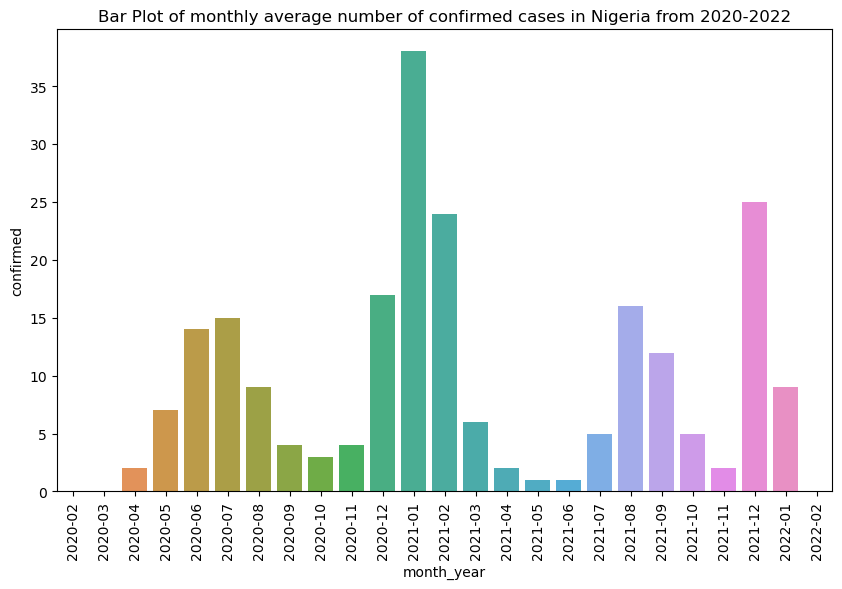

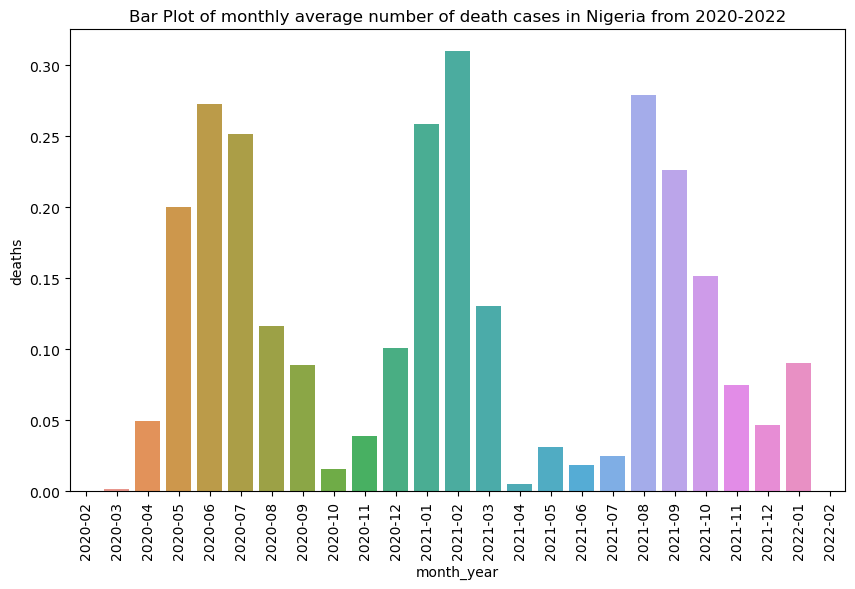

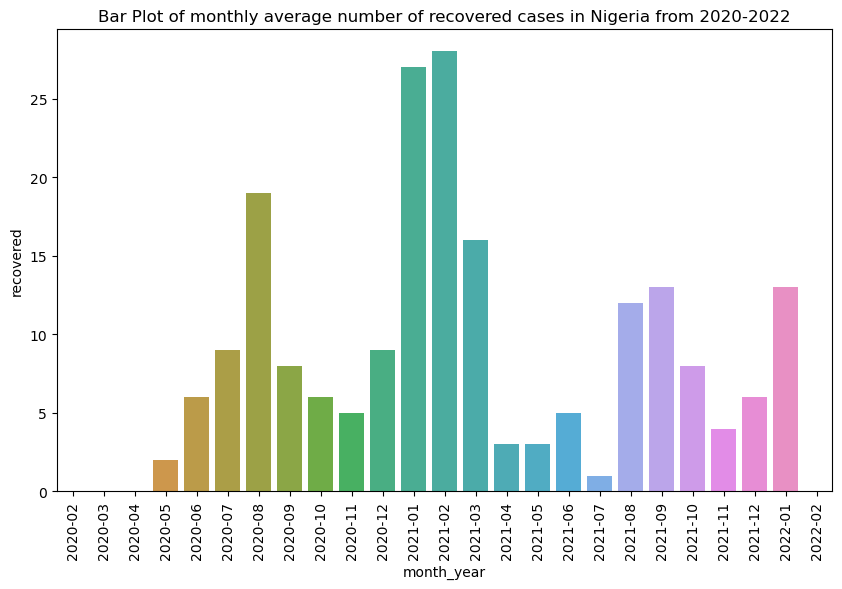

In [51]:
for cases,title in zip(['confirmed','deaths','recovered'], ['Bar Plot of monthly average number of confirmed cases in Nigeria from 2020-2022', 'Bar Plot of monthly average number of death cases in Nigeria from 2020-2022', 'Bar Plot of monthly average number of recovered cases in Nigeria from 2020-2022']):
    
    # Create a figure and axis object
    fig, ax = plt.subplots(figsize = (10,6))
    
    # Create a bar plot for all cases
    sns.barplot(x = month_yr_cases.index, y = month_yr_cases[cases])
    
    # Rotate the xlabel to easier readability
    plt.xticks(rotation = 90)
   
    # Create the title for all cases
    plt.title(title)
    
    plt.show()
    

From the bar plots above, we can see that the monthly average number of confirmed, death and recovered cases continued to fluctuate across the months from 2020 to 2022. It gradually rose then fell and continued with this pattern.

In [52]:
ans9 =   round(month_yr_cases['confirmed'].mean())
ans10 =  round(month_yr_cases['deaths'].mean(),2)
ans11 =  round(month_yr_cases['recovered'].mean())

print('Total montly average number of confirmed cases in Nigeria was {}'.format(ans9))
print('Total monthly average number of death cases in Nigeria was {}'.format(ans10))
print('Total monthly average number of recovered cases in Nigeria was {}'.format(ans11))

Total montly average number of confirmed cases in Nigeria was 9
Total monthly average number of death cases in Nigeria was 0.11
Total monthly average number of recovered cases in Nigeria was 8


## 8. What state was affected the most by the pandemic?

In order to address this question, I will first group the cases by state and then visualize the result using a barplot.

In [53]:
# Find the total number of confirmed,death and recovered cases in Nigeria for each state from 2020 to 2022
state = df.groupby('state')[['confirmed','deaths','recovered']].sum()

# Create a new dataframe to hold this information. state is the index and the cases have their wn columns
state = pd.DataFrame(state)
state.head()

,confirmed,deaths,recovered
state,,,
Abia,2152,34,2112
Adamawa,1203,32,1103
Akwa Ibom,4625,44,4494
Anambra,2744,19,2678
Bauchi,1936,24,1878


**Draw a bar plot to visualize the result**

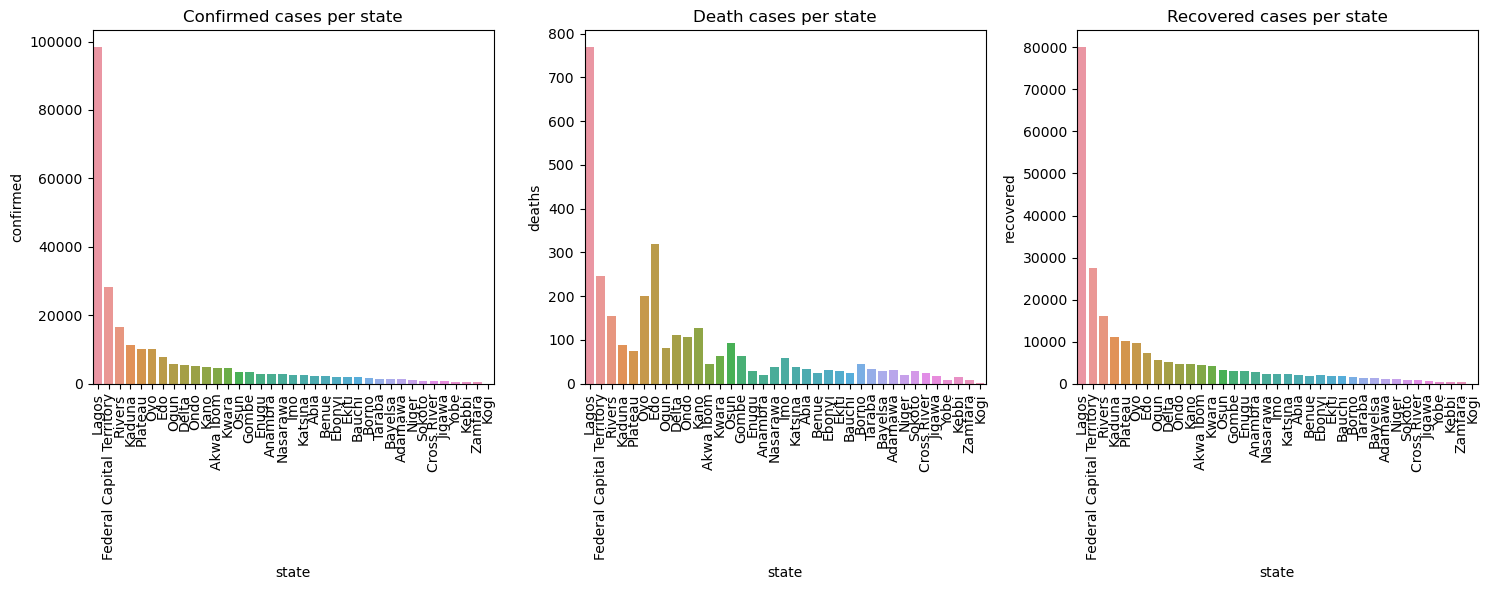

In [54]:
# Arrange chart in descending order
state = state.sort_values(by = 'confirmed', ascending = False)

# Create figure and axis
fig,axs = plt.subplots(1,3,figsize = (15,6))

# plot bar for confirmed cases
state1 = sns.barplot(data = state, x = state.index, y = state.confirmed, ax = axs[0])
state1.set(title = 'Confirmed cases per state')
state1.set_xticklabels(state1.get_xticklabels(), rotation = 90, size = 10)

# plot bar for death cases
state2 = sns.barplot(data = state, x = state.index, y = state.deaths, ax = axs[1])
state2.set(title = 'Death cases per state')
state2.set_xticklabels(state2.get_xticklabels(), rotation = 90, size = 10)

# plot bar for Recovered cases
state3 = sns.barplot(data = state, x = state.index, y = state.recovered, ax = axs[2])
state3.set(title = 'Recovered cases per state')
state3.set_xticklabels(state3.get_xticklabels(), rotation = 90, size = 10)

# Set spacing between suplots
fig.tight_layout()

# Display the bar chart
plt.show()


From the bar plot above, Lagos state took the largest hit, having the highest confirmed, death and recovery cases by a landslide in comparison with other states.
This could have been brought about by the high population and relatively smaller land mass of lagos state in comparison with other states.

The capital city (FCT) also recorded some high confirmed, death and recovery cases in comparison to other states but not nearly as high as Lagos state. 

**Draw a pie chart to visualize top 10 affected states**

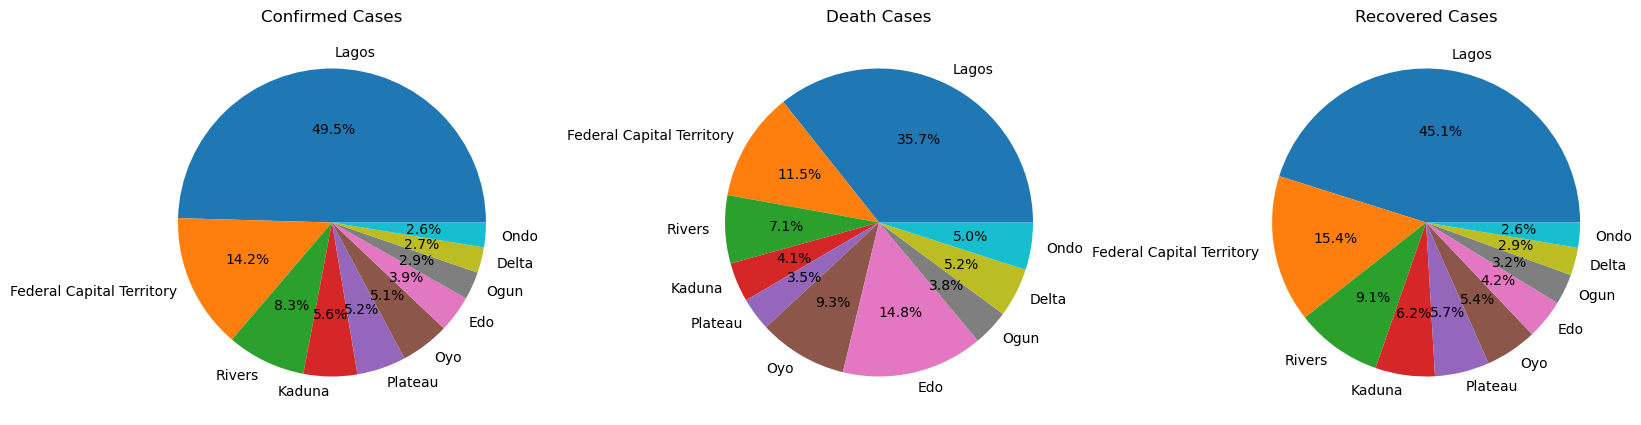

In [56]:
# Arrange in descending order
top10states = state.sort_values(by = 'confirmed', ascending = False)[:10]

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Create the pie charts for confirmed subplot
axs[0].pie(top10states['confirmed'], labels=top10states.index, autopct='%1.1f%%')
axs[0].set_title('Confirmed Cases')

# Create the pie charts for death subplot
axs[1].pie(top10states['deaths'], labels=top10states.index, autopct='%1.1f%%')
axs[1].set_title('Death Cases')

# Create the pie charts for recovered subplot
axs[2].pie(top10states['recovered'], labels=top10states.index, autopct='%1.1f%%')
axs[2].set_title('Recovered Cases')

# Display the pie charts
plt.show()


Based on the data presented in the pie chart, Lagos state has the highest percentage of confirmed, death, and recovered cases compared to the other top 10 states. Specifically, Lagos state has 49.5% of the confirmed cases, 35.7% of the death cases, and 45.1% of the recovered cases. This suggests that Lagos state has been more heavily impacted by the virus compared to the other states in the top 10 states.

> I will perform a further analysis to investigate the top 2 states in Nigeria hit the most my the pandemic.
Lagos and Federal Capital Territory, Which will be refered to as High Risk areas

## Analysis on the High Risk Areas

### a). Analysis on Lagos state - Scatter plot visualizing the daily number of cases in Lagos state

In [57]:
# to Show only the rows that have lagos in the state column
lagos = df.loc[df['state'] == 'Lagos']

#to reset the index of this new dataframe
lagos = lagos.reset_index(drop= True) 

#show the resulting dataframe
lagos.sample(5)

,date,country,state,confirmed,deaths,recovered,month_year
475,2021-06-16,Nigeria,Lagos,20,0,0,2021-06
535,2021-08-15,Nigeria,Lagos,242,0,0,2021-08
59,2020-04-26,Nigeria,Lagos,42,0,6,2020-04
308,2020-12-31,Nigeria,Lagos,570,6,53,2020-12
583,2021-10-02,Nigeria,Lagos,24,0,0,2021-10


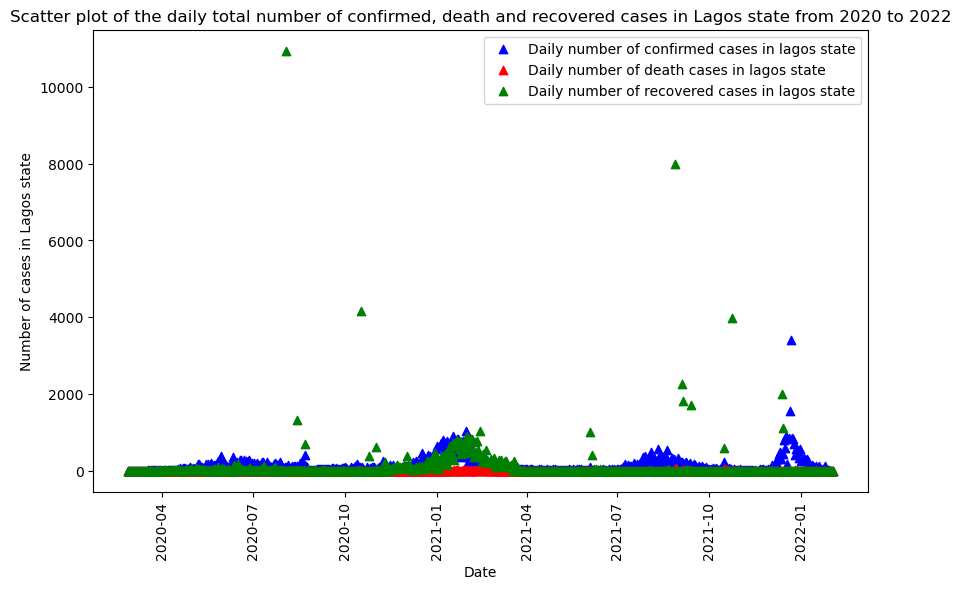

In [58]:
fig,ax = plt.subplots(figsize = (10,6))

plt.scatter(lagos['date'], lagos['confirmed'], color = 'blue', marker = '^', label = 'Daily number of confirmed cases in lagos state')
plt.scatter(lagos['date'], lagos['deaths'], color = 'red',  marker = '^', label = 'Daily number of death cases in lagos state')
plt.scatter(lagos['date'], lagos['recovered'], color = 'green',  marker = '^', label = 'Daily number of recovered cases in lagos state')


plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of cases in Lagos state')
plt.xticks(rotation = 90)
plt.title('Scatter plot of the daily total number of confirmed, death and recovered cases in Lagos state from 2020 to 2022')

plt.show()

In [59]:
round(lagos[['confirmed','deaths','recovered']].mean())

confirmed    139.0
deaths         1.0
recovered    113.0
dtype: float64

Looking at the chart, Lagos had a bit of control over the pandemic, 
- the average daily confirmed case was 139
- the average daily death case was 1 
- the average daily recovered case was 113

However, there were some really high number of cases on certain days.

- 22nd December,2021 held the highest number of confirmed cases in lagos with a total of 3,393 cases
- 29th August 2021 held the highest number of death cases in Lagos with a total of 79 cases 
- 3rd August 2020 held the highest number of recovered cases in Lagos with a total of 10,946 cases. 


### b) Analysis on Federal Capital Territory(FCT) - Scatter plot visualizing the daily number of cases in FCT

In [60]:
#to Show only the rows that have lagos in the state column
fct = df.loc[df['state'] == 'Federal Capital Territory']

#to reset the index of this new dataframe
fct = fct.reset_index(drop= True) 

#show the resulting dataframe
fct.sample(5)

,date,country,state,confirmed,deaths,recovered,month_year
425,2021-04-27,Nigeria,Federal Capital Territory,8,1,5,2021-04
62,2020-04-29,Nigeria,Federal Capital Territory,16,0,0,2020-04
382,2021-03-15,Nigeria,Federal Capital Territory,9,1,34,2021-03
626,2021-11-14,Nigeria,Federal Capital Territory,3,0,270,2021-11
30,2020-03-28,Nigeria,Federal Capital Territory,5,0,0,2020-03


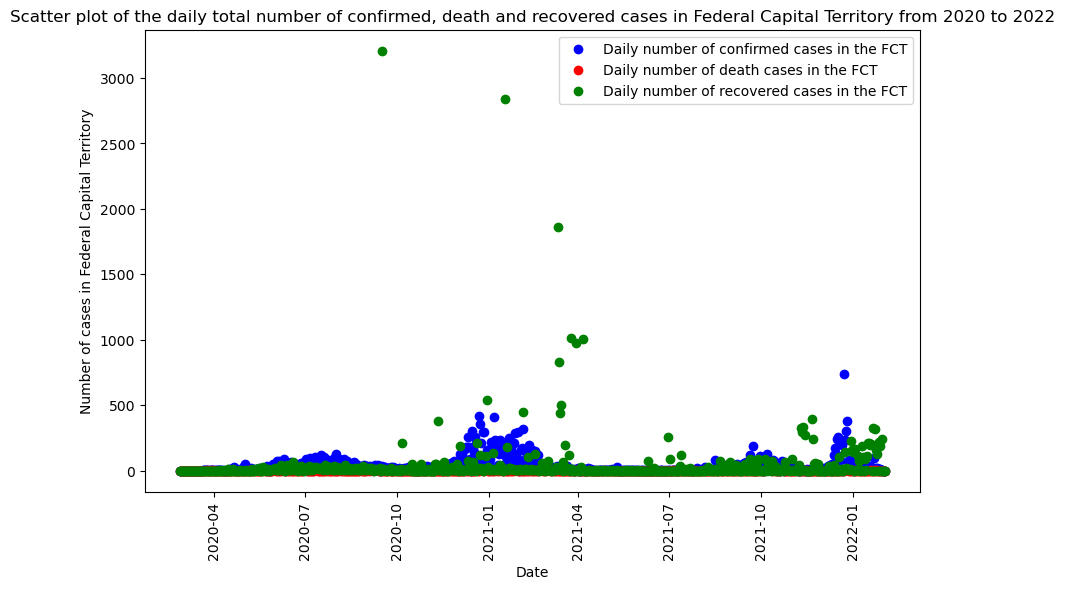

In [61]:
fig,ax = plt.subplots(figsize = (10,6))

plt.scatter(fct['date'], fct['confirmed'], color = 'blue', label = 'Daily number of confirmed cases in the FCT')
plt.scatter(fct['date'], fct['deaths'], color = 'red', label = 'Daily number of death cases in the FCT')
plt.scatter(fct['date'], fct['recovered'], color = 'green', label = 'Daily number of recovered cases in the FCT')


plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of cases in Federal Capital Territory')
plt.xticks(rotation = 90)
plt.title('Scatter plot of the daily total number of confirmed, death and recovered cases in Federal Capital Territory from 2020 to 2022')

plt.show()


In [62]:
round(fct[['confirmed','deaths','recovered']].mean())

confirmed    40.0
deaths        0.0
recovered    39.0
dtype: float64

Looking at the chart, FCT majorly had low number of cases during the pandemic. 

- The average daily confirmed case was 40
- The average daily death case was 0 
- The average daily recovered case was 40

However, there were some really high number of cases on certain days, similar to what we saw in Lagos.

- 23rd December,2021 held the highest number of confirmed cases in FCT with a total of 734 cases
- 1st September 2020 held the highest number of death cases in FCT with a total of 9 cases 
- 16th September 2020 held the highest number of recovered cases in FCT with a total of 3,208 cases.

**The state most affected by the pandemic was Lagos state, followed by the Federal Capital Territory**

## 9. Was there any correlation between the confirmed, death and recovered cases?

To find what cases are strongly or least correlated to each other, I will use a heatmap to visulize the relationship between confirmed, death and recovered cases

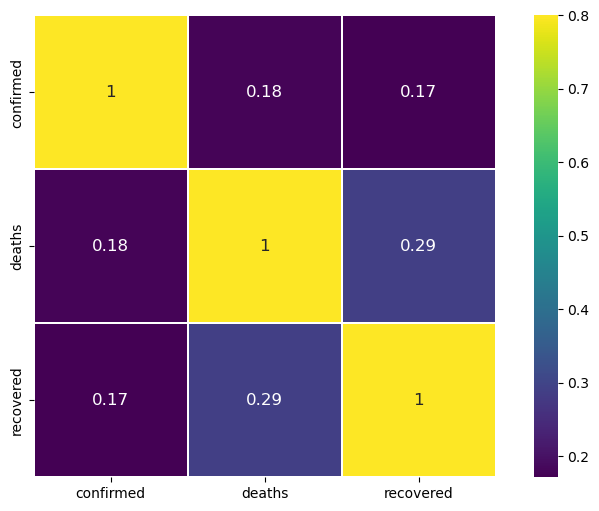

In [63]:
# Getting the correlation coefficient
correlation = df.corr()

# Creating a heatmap to visualize the correlation coefficients
f, ax = plt.subplots(figsize = (10,6))
sns.heatmap(correlation, vmax = 0.8, linewidths = 0.01, square = True, annot = True, cmap = 'viridis',
           linecolor = 'white', xticklabels = correlation.columns, annot_kws = {'size':12}, 
            yticklabels = correlation.columns);

Based on this threshold;
- 0.1 to 0.3  is a weak correlation
- 0.3 to 0.7  is an average correlation
- 0.7 to 1.0  is a strong correlation

1. The correlation coefficient between confirmed and deaths was 0.18, indicating a weak positive correlation. This means that as the number of confirmed cases increases, there is a slight tendency for the number of deaths to increase as well.
2. The correlation coefficient between confirmed and recovered was 0.17, also indicating a weak positive correlation. This means that as the number of confirmed cases increases, there is a slight tendency for the number of recoveries to increase as well.
3. The correlation coefficient between deaths and recovered was 0.29, indicating a weak positive correlation. This means that as the number of deaths increases, there is a tendency for the number of recoveries to increase as well.

# Analysis Insight

Based on the analysis of the COVID-19 pandemic in Nigeria from 2020 to 2022, it is clear that the pandemic had quite an impact on the country. Nigeria recorded a total of 253,024 confirmed cases, 3,135 deaths, and 229,076 recoveries during this period.

The mortality rate from COVID-19 was 1.24%, while the recovery rate was 90.54%. This suggests that while the pandemic had been deadly, a great number of the Nigeria population that contacted this virus recovered from it. 

The daily average of confirmed, death, and recovered cases in Nigeria for the period of analysis was 10, 0.04, and 9 respectively, while the monthly average was 9, 0.11, and 8 respectively. This indicates that while there were fluctuations in the number of cases, deaths, and recoveries over time, the pandemic was generally present throughout the period of analysis.

Lagos state was the most affected by the pandemic, recording the highest number of confirmed cases, deaths, and recoveries and followed by the Federal Capital Territory.

Finally, there was a weak correlation between the number of confirmed, death, and recovery cases. As the number of confirmed cases increased, there was a slight increase the number of deaths and recoveries. This suggests that efforts to control the spread of the disease can also impact the number of deaths and recoveries.

Overall, this analysis provided valuable insights into the COVID-19 pandemic in Nigeria, and highlighted the need for continued efforts to control the spread of the disease and support those who had been affected by it.


*The End*

***Hope you enjoyed this notebook. Connect with me using the below links.***

[My linkedin](https://www.linkedin.com/in/judith-okon-pmp%C2%AE-146451138/) 
[My Twitter](https://twitter.com/likedbyJ)
[My Github](https://github.com/Judithokon)